#**Descarga y formatting de DATOS TABULARES: AIRBNB BOSTON**

In [ ]:
import cv2
import numpy as np
import pandas as pd
import imageio.v3 as io

from tqdm import tqdm
from typing import Optional, Union

In [ ]:
import os
print(os.getcwd())

/content


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Deep_Learning_2024/Notebooks/data/dataset.csv", sep = ';')
data = data.dropna(subset=['price'])
data

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,1046563598019556549,https://www.airbnb.com/rooms/1046563598019556549,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,77,0,0,1.00
7195,1046568292864752336,https://www.airbnb.com/rooms/1046568292864752336,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN
7196,1047166785349446101,https://www.airbnb.com/rooms/1047166785349446101,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,233908696,https://www.airbnb.com/users/show/233908696,Together We,2019-01-02,...,NaN,NaN,NaN,STR-531165,t,2,2,0,0,NaN
7197,1047226383263246733,https://www.airbnb.com/rooms/1047226383263246733,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN


In [ ]:
# ¿De qué variables disponemos?
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'ava

## Descarga de imágenes

In [ ]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = np.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=np.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

Normalización y conversión en el rango [0, 1]

**RECORDAD SEÑALAR LA COLUMNA ADECUADA**

In [ ]:
images, idxs = download_images(data['picture_url'])
images = images.astype("float32") / 255.
images.shape

100%|██████████| 7199/7199 [33:35<00:00,  3.57it/s]


(6261, 224, 224, 3)

In [ ]:
# Imprimir dimensiones de las primeras y últimas 5 imágenes
for i, img in enumerate(images):
    if i < 5 or i >= len(images) - 5:
        print(f"Imagen {i+1} dimensiones: {img.shape}")


Imagen 1 dimensiones: (224, 224, 3)
Imagen 2 dimensiones: (224, 224, 3)
Imagen 3 dimensiones: (224, 224, 3)
Imagen 4 dimensiones: (224, 224, 3)
Imagen 5 dimensiones: (224, 224, 3)
Imagen 6257 dimensiones: (224, 224, 3)
Imagen 6258 dimensiones: (224, 224, 3)
Imagen 6259 dimensiones: (224, 224, 3)
Imagen 6260 dimensiones: (224, 224, 3)
Imagen 6261 dimensiones: (224, 224, 3)


Filtrado acorde en los demás datos

In [ ]:
# Filtramos el df para quedarnos con las columnas que descargaron efectivamente las imagenes

filtered_data = data.iloc[idxs]
filtered_data

,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,1046563598019556549,https://www.airbnb.com/rooms/1046563598019556549,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,5.00,5.00,5.00,Exempt: This listing is a unit that has contra...,f,77,77,0,0,1.00
7195,1046568292864752336,https://www.airbnb.com/rooms/1046568292864752336,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN
7196,1047166785349446101,https://www.airbnb.com/rooms/1047166785349446101,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,233908696,https://www.airbnb.com/users/show/233908696,Together We,2019-01-02,...,NaN,NaN,NaN,STR-531165,t,2,2,0,0,NaN
7197,1047226383263246733,https://www.airbnb.com/rooms/1047226383263246733,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/prohost-api/H...,212359760,https://www.airbnb.com/users/show/212359760,Evonify,2018-08-29,...,NaN,NaN,NaN,Exempt: This listing is a unit that has contra...,f,77,77,0,0,NaN


In [ ]:
# Contar el número total de filas antes de eliminar duplicados
filas_totales = len(filtered_data)

# Contar el número de filas únicas
filas_unicas = len(filtered_data.drop_duplicates())

# Calcular el número de filas duplicadas
filas_duplicadas = filas_totales - filas_unicas

# Imprimir el resultado
print(f"Se eliminarán {filas_duplicadas} filas duplicadas.")

#El resultado es
#Se eliminarán 3130 filas duplicadas.

Se eliminarán 3130 filas duplicadas.


In [ ]:
# Eliminar filas duplicadas y reiniciar el índice
filtered_data = filtered_data.drop_duplicates().reset_index(drop=True)


In [ ]:
#Alinear images a la longitud de filtered_data
images = images[:len(filtered_data)]


In [ ]:
# Eliminar el símbolo de dólar y convertir a tipo numérico label 'price'
filtered_data['price'] = filtered_data['price'].replace('[\$,]', '', regex=True).astype(float)
# Ver solo la columna 'price'
print(filtered_data['price'])



0       125.0
1       135.0
2       179.0
3        91.0
4        86.0
        ...  
3126     83.0
3127    107.0
3128    136.0
3129     83.0
3130    106.0
Name: price, Length: 3131, dtype: float64


## Guardado de los datos para posterior uso/selección

In [ ]:
np.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp images.npy /content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/images_final.npy
!cp filtered_data.csv /content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/filtered_data.csv
!ls -lah images* filtered*  # Comprobación

-rw-r--r-- 1 root root 3.4M Nov 12 14:42 filtered_data.csv
-rw-r--r-- 1 root root 1.8G Nov 12 14:42 images.npy


In [ ]:
# Comprobamos a abrirlos de nuevo
saved_data = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/filtered_data.csv", sep=';')
saved_imgs = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/images_final.npy")
saved_data.shape, saved_imgs.shape

((3131, 72), (3131, 224, 224, 3))

In [ ]:
images.min()

0.0

In [ ]:
images.max()

1.0

In [ ]:
type(images[0])

numpy.ndarray

In [ ]:
images.shape

(3131, 224, 224, 3)

In [ ]:
# Ver las primeras 5 filas de todas las columnas en filtered_data
saved_data.head()


,id,listing_url,scrape_id,last_scraped,source,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.89,4.55,4.75,STR-490093,f,10,10,0,0,0.68
2,6695,https://www.airbnb.com/rooms/6695,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,...,4.95,4.51,4.71,STR-491702,f,10,10,0,0,0.73
3,8789,https://www.airbnb.com/rooms/8789,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,Anne,2009-07-22,...,4.96,4.96,4.56,NaN,f,9,9,0,0,0.24
4,10813,https://www.airbnb.com/rooms/10813,20231218233145,2023-12-19,city scrape,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,...,5.00,5.00,4.80,NaN,f,11,11,0,0,0.09


##SPLIT DE DATOS EN TRAIN, VALIDATION Y TEST EN DATOS TABULARES E IMÁGENES
---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividir el dataset tabular en train, val y test y obtener los índices
fd_train, fd_test, idx_train, idx_test = train_test_split(
    filtered_data, range(len(filtered_data)), test_size=0.2, random_state=42
)
fd_train, fd_val, idx_train, idx_val = train_test_split(
    fd_train, idx_train, test_size=0.15, random_state=42
)

# Guardar cada conjunto tabular en un único archivo CSV en Google Drive
fd_train.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train.csv", sep=';', index=False)
fd_val.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val.csv", sep=';', index=False)
fd_test.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test.csv", sep=';', index=False)

# Dividir las imágenes usando los índices obtenidos de los datos tabulares
imgs_train = images[idx_train]
imgs_val = images[idx_val]
imgs_test = images[idx_test]

# Guardar los conjuntos de imágenes en archivos .npy
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train.npy", imgs_train)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val.npy", imgs_val)
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test.npy", imgs_test)


In [ ]:
import pandas as pd

# Cargar el último estado de fd_train desde Google Drive. ARCHIVOS DESPUES DE DIVISION DE DATOS.
fd_train = pd.read_csv('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train.csv', sep=';')
fd_val = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val.csv", sep=';',)
fd_test = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test.csv", sep=';')


In [ ]:
fd_train = pd.read_csv('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train.csv', sep=';')

## C.  Normalización y redimensionado de datos numéricos y categóricos DATOS TABULARES FD_TRAIN

In [ ]:
pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [ ]:
#revisar valores únicos
fd_train.apply(lambda x: len(x.unique()))



,0
id,2128
listing_url,2128
scrape_id,1
last_scraped,2
source,2
picture_url,2080
host_id,836
host_url,836
host_name,635
host_since,753


In [ ]:
#Revisar que tipo de datos tenemos y nulls
data_overview = pd.DataFrame({
    'Data Type': fd_train.dtypes,
    'Total Nulls': fd_train.isnull().sum()
})

# Mostrar el DataFrame
data_overview



,Data Type,Total Nulls
id,int64,0
listing_url,object,0
scrape_id,int64,0
last_scraped,object,0
source,object,0
picture_url,object,0
host_id,int64,0
host_url,object,0
host_name,object,0
host_since,object,0


In [ ]:
# Identificar columnas con más del 50% de valores nulos
high_null_columns = data_overview[data_overview['Total Nulls'] > (0.5 * len(fd_train))]
high_null_columns


,Data Type,Total Nulls
neighbourhood_group_cleansed,float64,2128
bathrooms,float64,2128
bedrooms,float64,2128
calendar_updated,float64,2128


DROPS DE COLUMNAS QUE NO FUNCIONAN PARA LO QUE REQUERIMOS

100% NULLS:
1. Eliminare *'calendar_update'* por que tiene 100 nulls% y ya tenemos otras 2 features de 'neighbourhood' por lo que *'neighbourhood_group_cleansed'* no hace falta.

2. Bathrooms' y 'bedrooms' se trabajaran mas adelante pues se contrastaran con 'bathrooms_text' y 'beds'.

OTRAS VARIABLES QUE NO APORTAN A PRICE:

3.
*scrape_id:* no aporta información sobre la propiedad.

*last_scraped:* no aporta información sobre la propiedad.

*source:* no aporta información sobre la propiedad.

*host_id*: aporta información sobre el dueño, pero no sobre la propiedad *

*host_url:* no aporta información sobre la propiedad.

  *host_name:* no aporta información sobre la propiedad.

  *host_thumbnail_url:* no aporta información sobre la propiedad.

  *host_location:* no aporta información sobre la propiedad.

  *host_about:* no aporta información sobre la propiedad.

  *host_picture_url:* no aporta información sobre la propiedad.

  *Host_neighbourhood:* no aporta información sobre la propiedad.

  *host_listings_count:* no aporta información sobre la propiedad.

  *maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm:* redundantes con maximun y minimu_nights

  *has_availability,availability_30,availability_60,availability_90:* es redundante se deja solo availability_365

  *calendar_last_scraped:* no aporta información sobre la propiedad.

  *license:* no aporta información valiosa a precio.

  *calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms, calculated_host_listings_count:* son redudantes contador relacionado con el dueño; no aporta información sobre la propiedad.

  *first_review:* no aporta información nueva; ya hay un dato de antiguedad del dueño con host_since

  *last_review:* no aporta información nueva.



In [ ]:
# Hacemos un drop de todas las columnas que no aportan información relevante a precio o inmueble en df_train

not_useful_columns = [
    'first_review', 'last_review', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'calculated_host_listings_count', 'license', 'calendar_last_scraped',
    'has_availability', 'availability_30', 'availability_60', 'availability_90',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'host_listings_count',
    'host_neighbourhood', 'host_picture_url', 'host_about', 'host_location',
    'host_thumbnail_url', 'host_name', 'host_url', 'host_id', 'source',
    'last_scraped', 'scrape_id', 'neighbourhood_group_cleansed', 'calendar_updated'
]

fd_train.drop(not_useful_columns, axis=1, inplace=True)


In [ ]:
fd_train.shape


(2128, 41)

##Imputacion de NULLS columnas numéricas:

In [ ]:
# Identificar columnas numéricas con valores nulos
numeric_columns = fd_train.select_dtypes(include=['float64', 'int64']).columns
numeric_null_columns = numeric_columns[fd_train[numeric_columns].isnull().any()]

# Contar los valores nulos en cada una de las columnas numéricas con nulos
numeric_null_counts = fd_train[numeric_null_columns].isnull().sum()
numeric_null_counts



,0
bathrooms,2128
bedrooms,2128
beds,32
review_scores_rating,496
review_scores_accuracy,496
review_scores_cleanliness,496
review_scores_checkin,497
review_scores_communication,496
review_scores_location,497
review_scores_value,497


#nulls en review_scores_* y reviews_per_month

Usaré la mediana para imputar valores nulos en las columnas de calificaciones (review_scores_*) y frecuencia de revisiones (reviews_per_month) por las siguientes razones:

1. Las calificaciones y frecuencias de revisiones suelen tener una distribución asimétrica. La mediana es más robusta porque representa el valor central de la distribución sin ser influenciada por outliers.

2. Las calificaciones y frecuencias son valores continuos y escalares.

In [ ]:
import pandas as pd
import joblib

# Imputaré review_scores* y reviews_per_month con la mediana
review_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value', 'reviews_per_month']

# Crear un diccionario para almacenar las medianas
medianas_reviews = {}

# Imputación de cada columna con la mediana y guardar la mediana en el diccionario
for column in review_columns:
    mediana = fd_train[column].median()
    fd_train[column] = fd_train[column].fillna(mediana)
    medianas_reviews[column] = mediana

# Guardar las medianas en un archivo pickle para reutilizarlas en val y test
joblib.dump(medianas_reviews, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/medianas_reviews.pkl')

# Imprimir el número de nulos restantes después de la imputación
print("Número de nulos restantes después de la imputación en reviews*:")
print(fd_train[review_columns].isnull().sum())


Número de nulos restantes después de la imputación en reviews*:
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64


#Imputacion 'bathrooms' y 'bathrooms_text'
Continuaré con 'bathrooms' que tiene 100% de nulos pero 'bathrooms_text' tiene valores, se puede extraer el número de baños de 'bathrooms_text' y utilizarlo para llenar el valor en 'bathrooms'.
'bathrooms_text' contiene "shared", se agregaria una columna binaria ('bathroom_shared') para indicar si el baño es compartido [1]o privado [0].

In [ ]:
import re
import pandas as pd
import joblib

# Extraemos el número de baños de bathrooms_text
def extract_bathrooms(text):
    if pd.isnull(text):
        return None
    match = re.search(r'(\d+)', text)
    return float(match.group(1)) if match else None

# Crear una nueva columna 'bathrooms_shared' para indicar si el baño es compartido o no
fd_train['bathrooms_shared'] = fd_train['bathrooms_text'].apply(lambda x: 1 if 'shared' in str(x).lower() else 0)

# Imputar bathrooms usando bathrooms_text cuando bathrooms está en nulo
fd_train['bathrooms'] = fd_train['bathrooms'].combine_first(fd_train['bathrooms_text'].apply(extract_bathrooms))

# Eliminar bathrooms_text si ya no tiene nulos en bathrooms y bathrooms_shared
if fd_train['bathrooms'].isnull().sum() == 0 and fd_train['bathrooms_shared'].isnull().sum() == 0:
    fd_train.drop(columns=['bathrooms_text'], inplace=True)
    print("'bathrooms_text' ha sido eliminada porque ya no hay nulos en 'bathrooms' y 'bathrooms_shared'.")
else:
    print("'bathrooms_text' no ha sido eliminada porque aún hay nulos en 'bathrooms' o 'bathrooms_shared'.")

# Imprimir el número de nulos restantes después de la imputación
print("Nulos en 'bathrooms' después de la imputación:", fd_train['bathrooms'].isnull().sum())
print("Nulos en 'bathrooms_shared':", fd_train['bathrooms_shared'].isnull().sum())

# Guardar la información de imputación para reutilizar en val y test
bathrooms_median = fd_train['bathrooms'].median()  # Mediana de bathrooms para imputación en val y test
porcentaje_bathrooms_shared = fd_train['bathrooms_shared'].mean()  # Porcentaje de baños compartidos

joblib.dump({'bathrooms_median': bathrooms_median, 'porcentaje_bathrooms_shared': porcentaje_bathrooms_shared}, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/bathrooms_info.pkl')


'bathrooms_text' ha sido eliminada porque ya no hay nulos en 'bathrooms' y 'bathrooms_shared'.
Nulos en 'bathrooms' después de la imputación: 0
Nulos en 'bathrooms_shared': 0


['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/bathrooms_info.pkl']

# Imputar 'beds' que tiene 32 valores nulos

Puedo aplicar la imputación condicional basada en agrupaciones por características:

Usare *'property_type', 'room_type', 'accommodates', 'bathrooms' y la nueva variable creada 'bathrooms_shared'* para formar grupos que puedan representar propiedades similares en términos de cantidad de camas.

Calculare la mediana de beds en cada grupo para obtener el número típico de camas en propiedades similares.

Para cada fila con beds nulo, rellenamos con la mediana correspondiente al grupo al que pertenece.

In [ ]:
import pandas as pd
import joblib

# Calcular la mediana de 'beds' en cada grupo relevante y guardar las medianas calculadas
median_beds_grouped = fd_train.groupby(['property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_shared'])['beds'].median().reset_index()

# Renombrar la columna para evitar confusiones después del merge
median_beds_grouped.rename(columns={'beds': 'beds_median_grouped'}, inplace=True)

# Imputar los valores nulos de 'beds' utilizando las medianas calculadas por grupo
fd_train = fd_train.merge(median_beds_grouped, on=['property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_shared'], how='left')
fd_train['beds'] = fd_train['beds'].fillna(fd_train['beds_median_grouped'])

# Imputar cualquier valor restante con la mediana global de 'beds'
mediana_global_beds = fd_train['beds'].median()
fd_train['beds'] = fd_train['beds'].fillna(mediana_global_beds)

# Eliminar la columna temporal 'beds_median_grouped' después de la imputación
fd_train.drop(columns=['beds_median_grouped'], inplace=True)

# Imprimir el número de nulos restantes en 'beds' después de la imputación
print("Nulos restantes en 'beds' después de la imputación:", fd_train['beds'].isnull().sum())

# Guardar las medianas calculadas para su uso en val y test
joblib.dump(median_beds_grouped, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/median_beds_grouped.pkl')
joblib.dump(mediana_global_beds, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/mediana_global_beds.pkl')


Nulos restantes en 'beds' después de la imputación: 0


['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/mediana_global_beds.pkl']

# Imputar 'bedrooms' que tiene 100% valores nulos

Dado que 'bedrooms' tiene 100% de valores nulos en train, si lo hago por agrupación de variables similares, no se podrá calcular medianas útiles sin algún valor inicial.

Revisaré los valores unicos de las variables clave para imputar 'bedrooms'

In [ ]:
# Código para obtener los valores únicos de las variables clave para imputación
print("Valores únicos de 'property_type':", fd_train["property_type"].unique())
print("Valores únicos de 'room_type':", fd_train["room_type"].unique())
print("Valores únicos de 'accommodates':", fd_train["accommodates"].unique())
print("Valores únicos de 'beds':", fd_train["beds"].unique())
print("Valores únicos de 'bathrooms_shared':", fd_train["bathrooms_shared"].unique())


Valores únicos de 'property_type': ['Entire condo' 'Entire rental unit' 'Private room in rental unit'
 'Room in hotel' 'Private room in bed and breakfast'
 'Entire serviced apartment' 'Room in boutique hotel'
 'Private room in home' 'Entire guest suite' 'Entire home' 'Boat'
 'Entire townhouse' 'Private room in guest suite' 'Private room in condo'
 'Private room in serviced apartment' 'Private room in hostel'
 'Shared room in rental unit' 'Private room in townhouse'
 'Shared room in condo' 'Entire loft' 'Entire place' 'Shared room in home'
 'Entire guesthouse' 'Private room' 'Private room in loft' 'Houseboat'
 'Room in aparthotel' 'Private room in vacation home'
 'Shared room in bed and breakfast' 'Entire vacation home'
 'Private room in casa particular' 'Shared room in vacation home']
Valores únicos de 'room_type': ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
Valores únicos de 'accommodates': [ 2  4  1  5  9  3  6  7  8 10 16 11 14 13 12 15]
Valores únicos de 'beds': [

##Estrategia para imputar 'bedrooms' con reglas

Segun los valores únicos, definiré reglas basadas en la estructura y lógica de *property_type, room_type, accommodates, beds, y bathrooms_shared*. Estas reglas garantizarán una imputación precisa de 'bedrooms' reproducible en train, validation, y test.

***A. Regla Basada en *room_type:* ***

Entire home/apt: Como es una unidad completa, es lógico asumir que el número de bedrooms está relacionado con la capacidad (accommodates).
La regla será:

Si accommodates ≤ 2 → bedrooms = 1.

Si 3 ≤ accommodates ≤ 4 → bedrooms = 2.

Si 5 ≤ accommodates ≤ 6 → bedrooms = 3.

Para accommodates > 6, aplicamos bedrooms = np.ceil(accommodates / 2).

Private room: La mayoría de las propiedades en esta categoría tienen una sola habitación. Imputaremos:

bedrooms = 1 (regla directa).

Hotel room y Shared room: Dado que son tipos de habitación sin división de áreas de descanso separadas, asignamos:

bedrooms = 1.


***B. Regla Complementaria con *property_type:* ***

Algunas propiedades específicas (como Entire condo, Entire rental unit, Entire guest suite) generalmente siguen las mismas reglas que Entire home/apt. Sin embargo, el uso de property_type sirve como validación de los valores que asigno asegurando que estoy cubriendo correctamente toda la variedad de propiedades.


***C. Regla Basada en *bathrooms_shared:* ***

Si el baño es compartido (bathrooms_shared = 1) y room_type es Private room, esto confirma que es una sola habitación.
Entonces:
bedrooms = 1.
Para los demás tipos, bathrooms_shared no afecta bedrooms directamente, pero se considera para validar los valores que se asignan en otros tipos.

Asi usó reglas claras que se aplican de forma determinística en train, luego en validation, y test, garantizando la consistencia sin riesgo de introducir sesgo.

In [ ]:
import numpy as np
import pandas as pd
from difflib import get_close_matches

# Definir los valores conocidos de 'room_type'
known_room_types = ["Entire home/apt", "Private room", "Hotel room", "Shared room"]

# Función de imputación de 'bedrooms' basada en reglas mejoradas
def imputar_bedrooms(df):
    for index, row in df.iterrows():
        room_type = row['room_type']

        # Normalizar valor: Convertir a minúsculas para evitar problemas de mayúsculas/minúsculas
        room_type_normalized = room_type.lower() if pd.notnull(room_type) else None

        # Intentar encontrar coincidencias aproximadas con los valores conocidos
        match = get_close_matches(room_type_normalized, [rt.lower() for rt in known_room_types], n=1, cutoff=0.8)

        # Si encontramos una coincidencia, utilizamos el valor conocido
        if match:
            room_type_final = match[0].capitalize()
        else:
            # Si no hay coincidencias, intentamos hacer una clasificación basada en accommodates
            accommodates = row['accommodates']
            if pd.notnull(accommodates):
                if accommodates <= 2:
                    room_type_final = "Private room"  # Suposición razonable si solo tiene capacidad para 2
                elif accommodates >= 3 and accommodates <= 6:
                    room_type_final = "Entire home/apt"  # Suposición razonable para acomodar 3 a 6 personas
                else:
                    room_type_final = "Entire home/apt"  # Suposición razonable para más de 6 personas
            else:
                # Si no podemos hacer una clasificación basada en accommodates, asignamos un valor por defecto
                room_type_final = "Unknown"

        # Aplicar reglas para imputar 'bedrooms'
        if room_type_final == "Entire home/apt":
            # Reglas para 'Entire home/apt'
            if row['accommodates'] <= 2:
                df.at[index, 'bedrooms'] = 1
            elif 3 <= row['accommodates'] <= 4:
                df.at[index, 'bedrooms'] = 2
            elif 5 <= row['accommodates'] <= 6:
                df.at[index, 'bedrooms'] = 3
            else:
                df.at[index, 'bedrooms'] = np.ceil(row['accommodates'] / 2)

        elif room_type_final == "Private room":
            # Regla para 'Private room'
            df.at[index, 'bedrooms'] = 1

        elif room_type_final in ["Hotel room", "Shared room"]:
            # Regla para 'Hotel room' y 'Shared room'
            df.at[index, 'bedrooms'] = 1

        elif room_type_final == "Unknown":
            # Valor predeterminado para un 'room_type' desconocido, basándose en el número de accommodates
            df.at[index, 'bedrooms'] = np.ceil(row['accommodates'] / 2) if pd.notnull(row['accommodates']) else 1

    return df

# Aplicar la función a fd_train
fd_train = imputar_bedrooms(fd_train)

# Verificar nulos restantes en 'bedrooms' después de la imputación en train
print("Nulos restantes en 'bedrooms' después de la imputación en fd_train:", fd_train['bedrooms'].isnull().sum())


Nulos restantes en 'bedrooms' después de la imputación en fd_train: 0


In [ ]:
# Mostrar 5 ejemplos de los valores imputados en 'bedrooms'
print(fd_train[fd_train['bedrooms'].notnull()].sample(5))

                       id                                       listing_url  \
2093   716146741183188855   https://www.airbnb.com/rooms/716146741183188855   
2101             37253472             https://www.airbnb.com/rooms/37253472   
590              53105012             https://www.airbnb.com/rooms/53105012   
712              46873714             https://www.airbnb.com/rooms/46873714   
1465  1013126820633858190  https://www.airbnb.com/rooms/1013126820633858190   

                                            picture_url  host_since  \
2093  https://a0.muscache.com/pictures/98224177-fe93...  2022-08-30   
2101  https://a0.muscache.com/pictures/prohost-api/H...  2018-11-08   
590   https://a0.muscache.com/pictures/prohost-api/H...  2021-06-28   
712   https://a0.muscache.com/pictures/21d0acd7-7a60...  2012-11-05   
1465  https://a0.muscache.com/pictures/prohost-api/H...  2019-08-13   

     host_response_time host_response_rate host_acceptance_rate  \
2093     within an hour        

In [ ]:
# Identificar columnas numéricas con valores nulos
numeric_columns = fd_train.select_dtypes(include=['float64', 'int64']).columns
numeric_null_columns = numeric_columns[fd_train[numeric_columns].isnull().any()]

# Contar los valores nulos en cada una de las columnas numéricas con nulos
numeric_null_counts = fd_train[numeric_null_columns].isnull().sum()
numeric_null_counts

,0


###Imputacion de NULLS columnas catégoricas:

In [ ]:
# Identificar columnas categóricas con valores nulos
categorical_columns = fd_train.select_dtypes(include=['object']).columns
categorical_null_columns = categorical_columns[fd_train[categorical_columns].isnull().any()]

# Contar los valores nulos en cada una de las columnas categóricas con nulos
categorical_null_counts = fd_train[categorical_null_columns].isnull().sum()
print(categorical_null_counts)


host_response_time      166
host_response_rate      166
host_acceptance_rate    163
host_is_superhost        18
neighbourhood           808
dtype: int64


In [ ]:
# Ver todos los tipos de datos y el número de columnas de cada tipo en fd_train
data_types = fd_train.dtypes.value_counts()
print(data_types)


object     16
float64    14
int64      11
Name: count, dtype: int64


In [ ]:
fd_train['host_response_time'].unique()


array(['within a day', 'within an hour', 'within a few hours',
       'a few days or more', nan], dtype=object)

##Imputar columnas host_

_rate y _acceptance deben ser convertidas a numericos, tienen el simbolo % y luego el valor dividirlo en 100 para obtener un decimal del %.

Luego imputare _time basado en reglas condicionales de host_is_superhost y host_response_rate:

1. Si el anfitrión es un superhost (host_is_superhost == 't') o tiene una tasa de respuesta alta (host_response_rate >= 0.9), se asigna "within an hour".

2. Si la tasa de respuesta es media (0.5 <= host_response_rate < 0.9), se asigna "within a day".

3. Si la tasa de respuesta es baja o nula (host_response_rate < 0.5 o None), se asigna "a few days or more".

Para imputar _response_rate y _acceptance_rate utilizare la media de cada grupo basado en host_is_superhost:

1. Calculo la media de host_response_rate y host_acceptance_rate para cada grupo (t o f en host_is_superhost), y se guardan en diccionarios.

2. Uso transform para rellenar los valores nulos con la media del grupo correspondiente.

Para imputar host_is_superhost utilizare la moda.

In [ ]:
import numpy as np
import pandas as pd
import joblib

# Guardar la moda de 'host_is_superhost'
mode_host_is_superhost = fd_train['host_is_superhost'].mode()[0]

# Imputar 'host_is_superhost' con el valor más frecuente (moda) en el dataset
fd_train['host_is_superhost'] = fd_train['host_is_superhost'].fillna(mode_host_is_superhost)

# Convertir 'host_response_rate' y 'host_acceptance_rate' de texto a valores numéricos quitando el % y dividiendo el número por 100
fd_train['host_response_rate'] = fd_train['host_response_rate'].str.rstrip('%').astype(float) / 100
fd_train['host_acceptance_rate'] = fd_train['host_acceptance_rate'].str.rstrip('%').astype(float) / 100

# Guardar las medias de 'host_response_rate' y 'host_acceptance_rate' por grupo de 'host_is_superhost'
mean_host_response_rate = fd_train.groupby('host_is_superhost')['host_response_rate'].mean().to_dict()
mean_host_acceptance_rate = fd_train.groupby('host_is_superhost')['host_acceptance_rate'].mean().to_dict()

# Imputar 'host_response_rate' y 'host_acceptance_rate' basado en la media dentro de los grupos de 'host_is_superhost'
fd_train['host_response_rate'] = fd_train.groupby('host_is_superhost')['host_response_rate'].transform(lambda x: x.fillna(x.mean()))
fd_train['host_acceptance_rate'] = fd_train.groupby('host_is_superhost')['host_acceptance_rate'].transform(lambda x: x.fillna(x.mean()))

# Imputar 'host_response_time' basado en reglas condicionales en función de 'host_is_superhost' y 'host_response_rate'
def imputar_host_response_time(row):
    if pd.isnull(row['host_response_time']):
        # Si el anfitrión es superhost o tiene una tasa de respuesta alta, asignar respuestas rápidas
        if row['host_is_superhost'] == 't' or (row['host_response_rate'] is not None and row['host_response_rate'] >= 0.9):
            return 'within an hour'
        # Si el anfitrión tiene una tasa de respuesta media
        elif row['host_response_rate'] is not None and 0.5 <= row['host_response_rate'] < 0.9:
            return 'within a day'
        # Si el anfitrión tiene una tasa de respuesta baja o es nulo
        else:
            return 'a few days or more'
    return row['host_response_time']

# Aplicar la imputación condicional a 'host_response_time'
fd_train['host_response_time'] = fd_train.apply(imputar_host_response_time, axis=1)

# Guardar la información para su uso en val y test
joblib.dump({'mean_host_response_rate': mean_host_response_rate,
             'mean_host_acceptance_rate': mean_host_acceptance_rate,
             'mode_host_is_superhost': mode_host_is_superhost},
            '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/host_info.pkl')

# Verificar nulos restantes en las columnas host_*
print("Nulos restantes en host_response_time:", fd_train['host_response_time'].isnull().sum())
print("Nulos restantes en host_response_rate:", fd_train['host_response_rate'].isnull().sum())
print("Nulos restantes en host_acceptance_rate:", fd_train['host_acceptance_rate'].isnull().sum())
print("Nulos restantes en host_is_superhost:", fd_train['host_is_superhost'].isnull().sum())


Nulos restantes en host_response_time: 0
Nulos restantes en host_response_rate: 0
Nulos restantes en host_acceptance_rate: 0
Nulos restantes en host_is_superhost: 0


In [ ]:
# Identificar columnas categóricas con valores nulos
categorical_columns = fd_train.select_dtypes(include=['object']).columns
categorical_null_columns = categorical_columns[fd_train[categorical_columns].isnull().any()]

# Contar los valores nulos en cada una de las columnas categóricas con nulos
categorical_null_counts = fd_train[categorical_null_columns].isnull().sum()
print(categorical_null_counts)


neighbourhood    808
dtype: int64


##NULLS 'neighbourhood', primero CODIFICACIÓN

In [ ]:
# Get the unique values of 'neighbourhood' in the training dataset
unique_neighbourhood_values = fd_train['neighbourhood'].unique()
print(unique_neighbourhood_values)
print(f'Número total de categorías únicas en neighbourhood: {len(unique_neighbourhood_values)}')



[nan 'Boston, Massachusetts, United States'
 'Dorchester , Massachusetts, United States'
 'Jamaica Plain, Massachusetts, United States'
 'Roslindale, Massachusetts, United States'
 'Brighton, Massachusetts, United States'
 'Hyde Park, Massachusetts, United States'
 'Dedham, Massachusetts, United States'
 'Charlestown, Massachusetts, United States'
 'Dorchester, Massachusetts, United States'
 'Boston , Massachusetts, United States'
 'Hyde Park , Massachusetts, United States'
 'Boston, , Massachusetts, United States'
 ' Boston, Massachusetts, United States'
 'Dorchster , Massachusetts, United States'
 'Boston (Jamaica Plain), Massachusetts, United States'
 'East Boston, Massachusetts, United States'
 'Jamaica Plain, Boston, Massachusetts, United States'
 'Jamaica Plain , Massachusetts, United States']
Número total de categorías únicas en neighbourhood: 19


In [ ]:
# Verificar las categorías únicas en 'neighbourhood_cleansed'
unique_neighbourhood_cleansed = fd_train['neighbourhood_cleansed'].unique()
print(unique_neighbourhood_cleansed)
print(f'Número total de categorías únicas en neighbourhood_cleansed: {len(unique_neighbourhood_cleansed)}')



['East Boston' 'Downtown' 'South Boston' 'Bay Village' 'Roxbury'
 'North End' 'Dorchester' 'Brighton' 'South End' 'Back Bay' 'Fenway'
 'Jamaica Plain' 'Allston' 'Charlestown' 'West End' 'Beacon Hill'
 'Hyde Park' 'Mattapan' 'Roslindale' 'Chinatown' 'Mission Hill'
 'South Boston Waterfront' 'West Roxbury' 'Longwood Medical Area'
 'Leather District']
Número total de categorías únicas en neighbourhood_cleansed: 25


Hay inconsistencias de formato y errores tipográficos en **"neighbourhood"** que deben corregirse para asegurar una imputación precisa y consistente. Estandarizare los valores de la columna.

**'neighbourhood' y 'neighbourhood_cleansed'** son columnas que se relacionan, cleansed no tiene nulos por lo que puedo tomarla como ayuda para imputar. Utilizare un LabelEncoder para combinar los valores de las 2 columnas y crear un conjunto de categorias y que las relaciones entre los dos se mantengan consistentes.

df_val y df_test se beneficiaran del labelencoder ajustado que se guardará y se le agregara una categoria "unknown" a cualquier dato nuevo que reciban.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Calcular la distancia de Haversine entre dos puntos geográficos (para guardar para datos nuevos en val y train)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en kilómetros
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    return R * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

# Limpieza y estandarización de las columnas 'neighbourhood' y 'neighbourhood_cleansed'
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.strip()
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"\s+", " ", regex=True)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r", ,", ",", regex=True)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"Dorchster", "Dorchester", regex=False)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"\s+,", ",", regex=True)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"\(.*\)", "", regex=True).str.strip()
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r", Massachusetts, United States", "", regex=False)
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.strip()
fd_train['neighbourhood'] = fd_train['neighbourhood'].str.replace(r"Jamaica Plain, Boston", "Jamaica Plain", regex=False)

fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.strip()
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r"\s+", " ", regex=True)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r", ,", ",", regex=True)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r"Dorchster", "Dorchester", regex=False)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r"\s+,", ",", regex=True)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r"\(.*\)", "", regex=True).str.strip()
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.replace(r", Massachusetts, United States", "", regex=False)
fd_train['neighbourhood_cleansed'] = fd_train['neighbourhood_cleansed'].str.strip()

# Calcular los centroides geográficos (latitud y longitud promedio) por barrio
centroides = fd_train.groupby('neighbourhood')[['latitude', 'longitude']].mean()
print("Centroides calculados:")
print(centroides.head())

# Obtener los valores únicos combinados para entrenar el LabelEncoder
combined_unique_values = pd.concat([fd_train['neighbourhood'], fd_train['neighbourhood_cleansed']]).unique()

# Añadir una categoría especial '<UNK>' para manejar valores nuevos en validación y prueba
combined_unique_values = np.append(combined_unique_values, "<UNK>")

# Codificar las columnas utilizando Label Encoding con los valores combinados
le_combined = LabelEncoder()
le_combined.fit(combined_unique_values)

fd_train['neighbourhood'] = le_combined.transform(fd_train['neighbourhood'])
fd_train['neighbourhood_cleansed'] = le_combined.transform(fd_train['neighbourhood_cleansed'])

print("Valores únicos resultantes de 'neighbourhood' y 'neighbourhood_cleansed':",
      pd.concat([fd_train['neighbourhood'], fd_train['neighbourhood_cleansed']]).unique())

# Guardar el LabelEncoder, los centroides y la función haversine para validación y prueba
joblib.dump(le_combined, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/label_encoder_combined.pkl")
joblib.dump(centroides, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/centroides_neighbourhood.pkl")
joblib.dump(haversine, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/haversine_function.pkl")



Centroides calculados:
                latitude  longitude
neighbourhood                      
Boston         42.333663 -71.081977
Brighton       42.347140 -71.157413
Charlestown    42.375950 -71.061677
Dedham         42.254810 -71.145930
Dorchester     42.303645 -71.060888
Valores únicos resultantes de 'neighbourhood' y 'neighbourhood_cleansed': [28  5 10 15 21  6 14  9  7 12 11 23  3 22 20 25  2 13  1 26  4 18  8 19
 24 27 17 16]


['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/haversine_function.pkl']

##Imputación 'neighbourhood'
 Ahora que 'neighbourhood' y 'neighbourhood_cleansed' han sido codificados de manera consistente, se puede proceder a imputar los valores faltantes de una manera que sea lógica,

**Vecindarios cercanos y neighbourhood_cleansed:**

Utilizaremos la columna neighbourhood_cleansed ya que ambas variables se refieren a zonas similares.

**Modelo KNN:**

Se puede imputar los valores faltantes utilizando los vecindarios más cercanos, basándose en las columnas latitude, longitude, y la codificación de neighbourhood_cleansed tomando en cuenta la proximidad geográfica y los vecindarios categóricos.


In [ ]:
from sklearn.impute import KNNImputer

# Crear el imputador KNN
imputer = KNNImputer(n_neighbors=3)

# Ajustar el imputador KNN con el conjunto de train
columns_for_imputation = ['latitude', 'longitude', 'neighbourhood', 'neighbourhood_cleansed']
fd_train_imputed = imputer.fit_transform(fd_train[columns_for_imputation])

# Actualizar el DataFrame con los valores imputados en 'neighbourhood'
fd_train['neighbourhood'] = fd_train_imputed[:, 2]

# Guardar el imputador ajustado para usarlo en los conjuntos de validación y prueba
import joblib
joblib.dump(imputer, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/knn_imputer_trained.pkl")

"""
# Guardar el dataset de entrenamiento imputado si es necesario
fd_train.to_csv('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed.csv', sep=';', index=False)
"""


"\n# Guardar el dataset de entrenamiento imputado si es necesario\nfd_train.to_csv('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed.csv', sep=';', index=False)\n"

In [ ]:
fd_train.isnull().sum()

,0
id,0
listing_url,0
picture_url,0
host_since,0
host_response_time,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_total_listings_count,0
host_verifications,0


In [ ]:
# Guardar el dataset de entrenamiento imputado, SIN NULOS
fd_train.to_csv('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed.csv', sep=';', index=False)

In [ ]:
# Identificar columnas categóricas con valores nulos
categorical_columns = fd_train.select_dtypes(include=['object']).columns
categorical_null_columns = categorical_columns[fd_train[categorical_columns].isnull().any()]

# Contar los valores nulos en cada una de las columnas categóricas con nulos
categorical_null_counts = fd_train[categorical_null_columns].isnull().sum()
print(categorical_null_counts)


Series([], dtype: float64)


##Ya no tenemos NULLS ahora convertiremos las categoricas a numericas restantes:

In [ ]:
import pandas as pd

# Cargar el archivo con todas las imputaciones
fd_train_imputed = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed.csv", sep=';')

# Identificar columnas categóricas no numéricas
categorical_columns = fd_train_imputed.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas restantes que no han sido convertidas a numéricas
print("Columnas categóricas no numéricas restantes:", categorical_columns)


Columnas categóricas no numéricas restantes: Index(['listing_url', 'picture_url', 'host_since', 'host_response_time',
       'host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'property_type', 'room_type', 'amenities',
       'instant_bookable'],
      dtype='object')


In [ ]:
print("Información detallada del DataFrame:")
fd_train_imputed.info()

Información detallada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2128 non-null   int64  
 1   listing_url                  2128 non-null   object 
 2   picture_url                  2128 non-null   object 
 3   host_since                   2128 non-null   object 
 4   host_response_time           2128 non-null   object 
 5   host_response_rate           2128 non-null   float64
 6   host_acceptance_rate         2128 non-null   float64
 7   host_is_superhost            2128 non-null   object 
 8   host_total_listings_count    2128 non-null   int64  
 9   host_verifications           2128 non-null   object 
 10  host_has_profile_pic         2128 non-null   object 
 11  host_identity_verified       2128 non-null   object 
 12  neighbourhood                2128 non-n

##Comenzaré con las categorias host_

In [ ]:
# Convertir la columna 'host_since' a datetime para crear la columna 'years_being_host' que indicaria la antiguedad del host

from datetime import datetime

fd_train_imputed['host_since'] = fd_train_imputed['host_since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
fd_train_imputed['years_being_host'] = fd_train_imputed['host_since'].apply(lambda x: datetime.now().year - x.year)

fd_train_imputed.drop(['host_since'], axis=1, inplace=True)

print(fd_train_imputed['years_being_host'].dtype)

int64


##'host_response_time' valores unicos

In [ ]:
print(fd_train_imputed['host_response_time'].unique())


['within a day' 'within an hour' 'within a few hours' 'a few days or more']


 Utilizaré un mapa ordinal que asigna valores numéricos basados en el tiempo de respuesta para que el modelo entienda la diferencia en términos de relevancia y prioridad.

a. 'within an hour' → 4 (mejor, mayor prioridad para el modelo)

b. 'within a few hours' → 3

c. 'within a day' → 2

d. 'a few days or more' → 1 (peor, menor prioridad)


El objetivo de esta asignación es que el modelo entienda que los tiempos de respuesta más rápidos tienen un mayor valor, y aquellos que tardan más reducen la calidad del servicio del host.

In [ ]:
# Mapping para convertir los valores de 'host_response_time' en valores numéricos relevancia
response_time_mapping = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1
}

# Aplicar la transformación a la columna 'host_response_time'
fd_train_imputed['host_response_time'] = fd_train_imputed['host_response_time'].map(response_time_mapping)

# Verificar los valores únicos después de la transformación
print(fd_train_imputed['host_response_time'].unique())
print(fd_train_imputed['host_response_time'].dtype)


[2 4 3 1]
int64



##*host_is_superhost ,host_has_profile_pic, host_identity_verified e 'instant_bookable'*##
Son de tipo string 'f' y 't' por lo que podemos convertirlas en booleanos y luego en valores numericos binarios:
1 = True
0 = False



In [ ]:
# Convertir las cadenas 't' y 'f' a valores numéricos binarios (0 y 1) usando .apply()
boolean_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

for col in boolean_columns:
    fd_train_imputed[col] = fd_train_imputed[col].apply(lambda x: 1 if x == 't' else 0)

# Verificar los valores únicos para confirmar la transformación
for col in boolean_columns:
    print(f"Valores únicos en {col} (train):", fd_train_imputed[col].unique())




Valores únicos en host_is_superhost (train): [0 1]
Valores únicos en host_has_profile_pic (train): [1 0]
Valores únicos en host_identity_verified (train): [1 0]
Valores únicos en instant_bookable (train): [1 0]


##'host_verifications'

Quiero que funcione mejor esta columna para nuestro label precio. En la lógica de que un host con mas verificaciones es de mejor confianza y atrae mayor bookings.

Convertiré la columna 'host_verifications' str en listas reales.
Luego, contaré la cantidad de elementos en cada lista para crear una nueva columna llamada'num_host_verifications'. Estas listas se deben normalizar eliminando espacio para no tener problemas mas adelante.

Esta nueva característica será un valor numérico continuo que refleje el nivel de confianza del host, y debería correlacionarse positivamente con un precio más alto. En caso de que aparezca una lista vacia que note nga ningun ele mento de verificacion sera rellenado con un 0 para no generar problemas con datos futuros.

In [ ]:
print(fd_train_imputed['host_verifications'].unique())

["['email', 'phone']" "['phone']" "['email', 'phone', 'work_email']"
 "['phone', 'work_email']" "['email']"]


In [ ]:
from ast import literal_eval
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

# Convertir las cadenas de texto en listas reales usando literal_eval
fd_train_imputed['host_verifications'] = fd_train_imputed['host_verifications'].apply(literal_eval)

# Normalizar las listas eliminando espacios innecesarios y asegurando un formato consistente
fd_train_imputed['host_verifications'] = fd_train_imputed['host_verifications'].apply(
    lambda x: [item.strip().lower() for item in x]
)

# Contar el número de verificaciones para cada anfitrión, asegurando que las listas vacías sean tratadas como 0
fd_train_imputed['num_host_verifications'] = fd_train_imputed['host_verifications'].apply(
    lambda x: len(x) if len(x) > 0 else 0  # Listas vacías -> 0
)

# Clipping en el rango esperado (0 a 3)
fd_train_imputed['num_host_verifications'] = np.clip(
    fd_train_imputed['num_host_verifications'], 0, 3
)

# Escalar los valores directamente con MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.01, 0.99))
fd_train_imputed['num_host_verifications'] = scaler.fit_transform(
    fd_train_imputed[['num_host_verifications']]
)

# Guardar el escalador para aplicarlo en val y test
joblib.dump(scaler, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/scaler_verifications.pkl')

# Eliminar la columna original 'host_verifications' para evitar redundancia
fd_train_imputed.drop('host_verifications', axis=1, inplace=True)

# Verificar las primeras filas para asegurarnos de que la transformación se realizó correctamente
print(fd_train_imputed[['num_host_verifications']].head())


   num_host_verifications
0                    0.50
1                    0.50
2                    0.50
3                    0.01
4                    0.50


##'property_type'

Como tiene bastantes valores unicos aplicaré un Target Encoding que asigna a cada tipo de propiedad un valor numérico que refleja su relación con el precio promedio de las propiedades que pertenecen a esa categoría.

Calculare las medias para cada 'property_type' en fd_train_imputed.

In [ ]:
fd_train_imputed['property_type'].unique()

array(['Entire condo', 'Entire rental unit',
       'Private room in rental unit', 'Room in hotel',
       'Private room in bed and breakfast', 'Entire serviced apartment',
       'Room in boutique hotel', 'Private room in home',
       'Entire guest suite', 'Entire home', 'Boat', 'Entire townhouse',
       'Private room in guest suite', 'Private room in condo',
       'Private room in serviced apartment', 'Private room in hostel',
       'Shared room in rental unit', 'Private room in townhouse',
       'Shared room in condo', 'Entire loft', 'Entire place',
       'Shared room in home', 'Entire guesthouse', 'Private room',
       'Private room in loft', 'Houseboat', 'Room in aparthotel',
       'Private room in vacation home',
       'Shared room in bed and breakfast', 'Entire vacation home',
       'Private room in casa particular', 'Shared room in vacation home'],
      dtype=object)

In [ ]:
import joblib

# Calcular el promedio del precio para cada 'property_type' en el conjunto de entrenamiento
property_price_means = fd_train_imputed.groupby('property_type')['price'].mean().to_dict()

# Guardar las medias calculadas para 'property_type'
joblib.dump(property_price_means, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/property_price_means.pkl")

# Crear una nueva columna 'property_type_encoded' en el conjunto de train
fd_train_imputed['property_type_encoded'] = fd_train_imputed['property_type'].map(property_price_means)

# Eliminar la columna original 'property_type'
fd_train_imputed.drop('property_type', axis=1, inplace=True)

# Verificar las primeras filas para asegurarnos de que la transformación se realizó correctamente
print(fd_train_imputed[['property_type_encoded']].head())


   property_type_encoded
0             264.005155
1             190.545852
2              81.504950
3              81.504950
4              81.504950


##'room_type'
Aquí  también  calculare la media del precio de cada room_type.

In [ ]:
fd_train_imputed['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
import joblib

# Calcular las medias específicas para cada 'room_type'
room_price_means = fd_train_imputed.groupby('room_type')['price'].mean().to_dict()

# Calcular la media global del precio
global_mean_price_train = fd_train_imputed['price'].mean()

# Guardar las medias específicas y la media global
joblib.dump(
    {'room_price_means': room_price_means, 'global_mean_price_train': global_mean_price_train},
    "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/room_price_means.pkl"
)

# Crear una nueva columna 'room_type_encoded' usando las medias específicas
fd_train_imputed['room_type_encoded'] = fd_train_imputed['room_type'].map(room_price_means)

# Eliminar la columna original 'room_type'
fd_train_imputed.drop('room_type', axis=1, inplace=True)

# Verificar las primeras filas para asegurarnos de que la transformación se realizó correctamente
print(fd_train_imputed[['room_type_encoded']].head())


   room_type_encoded
0         217.807606
1         217.807606
2         129.135593
3         129.135593
4         129.135593


In [ ]:
categorical_columns = fd_train_imputed.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['listing_url', 'picture_url', 'amenities'], dtype='object')


Eliminaré las ultimas columnas que no son numericas *'listing_url', 'picture_url', 'amenities', 'id'* ya que no aportan al modelo.

Amenities podria vovler a ser creada mas adelante con la red neuronal de imagenes que permita ver los amenities y hacer tal vez una lista.

In [ ]:
# Eliminar columnas innecesarias del conjunto de entrenamiento
fd_train_imputed.drop(columns=['listing_url', 'picture_url', 'amenities', 'id'], inplace=True)

# Verificar que las columnas han sido eliminadas
print("Columnas restantes en fd_train_imputed:", fd_train_imputed.columns)



Columnas restantes en fd_train_imputed: Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathrooms_shared', 'years_being_host', 'num_host_verifications',
       'property_type_encoded', 'room_type_encoded'],
      dtype='object')


In [ ]:
print(len(fd_train_imputed))


2128


In [ ]:
# Verificar si existen columnas no numéricas en fd_train_imputed
non_numeric_columns = fd_train_imputed.select_dtypes(exclude=['number']).columns

# Imprimir las columnas no numéricas
print("Columnas no numéricas en fd_train_imputed:", non_numeric_columns)


Columnas no numéricas en fd_train_imputed: Index([], dtype='object')


In [ ]:
# Guardar el conjunto de entrenamiento imputado y con todas las columnas convertidas a numéricas
fd_train_imputed.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed_num.csv", sep=';', index=False)

# Confirmación del guardado
print("El archivo CSV con los datos imputados y numéricos ha sido guardado como 'fd_train_imputed_num.csv'")


El archivo CSV con los datos imputados y numéricos ha sido guardado como 'fd_train_imputed_num.csv'


##OUTLIERS

In [ ]:
import pandas as pd

# Cargar el conjunto de entrenamiento imputado y numérico desde el archivo CSV
fd_train_imputed_num = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed_num.csv", sep=';')

# Confirmación de la carga
print("El archivo CSV 'fd_train_imputed_num.csv' ha sido cargado exitosamente.")


El archivo CSV 'fd_train_imputed_num.csv' ha sido cargado exitosamente.


In [ ]:
fd_train_imputed_num.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bathrooms_shared,years_being_host,num_host_verifications,property_type_encoded,room_type_encoded
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,...,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000
mean,3.751410,0.960047,0.894890,0.328477,152.891447,0.988722,0.902256,13.812030,13.161184,42.334968,...,4.858571,4.760164,4.626377,0.293233,1.774601,0.243421,7.223684,0.501612,187.290883,187.290883
std,0.588039,0.124359,0.190206,0.469770,513.549553,0.105623,0.297038,11.131196,7.579254,0.027978,...,0.305590,0.334567,0.399166,0.455351,1.862244,0.429248,3.256871,0.229102,114.386181,50.368266
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,1.000000,42.235330,...,1.000000,1.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.010000,20.000000,51.833333
25%,4.000000,0.980000,0.869297,0.000000,3.000000,1.000000,1.000000,5.000000,7.000000,42.317647,...,4.870000,4.710000,4.570000,0.000000,0.580000,0.000000,5.000000,0.500000,101.826923,129.135593
50%,4.000000,1.000000,0.980000,0.000000,15.000000,1.000000,1.000000,5.000000,12.000000,42.342750,...,4.940000,4.850000,4.710000,0.000000,1.210000,0.000000,7.000000,0.500000,190.545852,217.807606
75%,4.000000,1.000000,1.000000,1.000000,76.000000,1.000000,1.000000,28.000000,21.000000,42.354094,...,5.000000,4.950000,4.810000,1.000000,2.232500,0.000000,10.000000,0.500000,190.545852,217.807606
max,4.000000,1.000000,1.000000,1.000000,6438.000000,1.000000,1.000000,28.000000,27.000000,42.391317,...,5.000000,5.000000,5.000000,1.000000,23.620000,1.000000,15.000000,0.990000,677.809524,508.357143


##OUTLIERS en 'price'

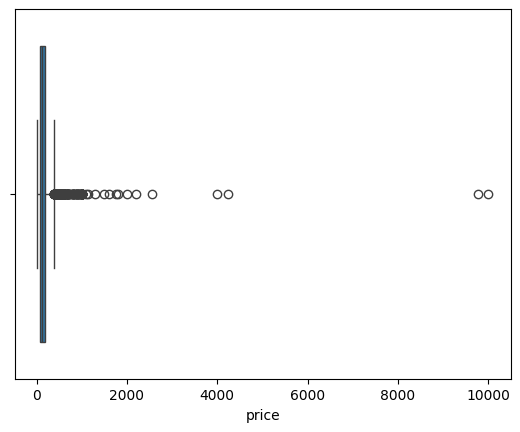

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# oxplot para la columna `price`
sns.boxplot(x=fd_train_imputed_num['price'])
plt.show()


*'price'* tiene valores extremos,su mayoria estan en una media de 199 y hay un max de 10000 por lo que podemos trabajar esto con transformación logarítmica:


Hay precios como *$4,245,  $9,770 y  $10,000* que son significativamente más altos que el resto y podrían estar sesgando la distribución de precios que no coinciden viendo las imagenes con su tamano y lo que ofrecen y sus precios por los que considero errores y los elimino.

In [ ]:
# Calcular el límite superior en el percentil 99 de la columna `price`
upper_limit = fd_train_imputed_num['price'].quantile(0.99)

# Filtrar los registros que superan el límite superior
outliers = fd_train_imputed_num[fd_train_imputed_num['price'] > upper_limit]

# Mostrar solo las columnas relevantes de los registros con outliers extremos
outliers_filtered = outliers[['price', 'accommodates', 'bedrooms', 'property_type_encoded', 'room_type_encoded', 'bathrooms_shared', 'beds']]
print(outliers_filtered)



        price  accommodates  bedrooms  property_type_encoded  \
165    1300.0            10       5.0             367.284091   
396    1100.0             5       3.0             190.545852   
553    1017.0             2       1.0             673.846154   
619    1800.0             6       3.0             190.545852   
713    1600.0            12       6.0             367.284091   
774   10000.0             2       1.0             677.809524   
783    1500.0             4       2.0             468.583333   
838    1150.0             7       4.0             264.005155   
1047   1017.0             2       1.0             673.846154   
1060   1017.0             4       1.0             673.846154   
1371   3999.0             4       2.0             264.005155   
1407   2000.0             1       1.0             101.826923   
1423   1758.0            12       1.0             673.846154   
1463   2557.0            16       8.0             367.284091   
1548   9770.0             2       1.0   

In [ ]:
# Número de registros antes de eliminar outliers inconsistentes
initial_count = fd_train_imputed_num.shape[0]

# Definir un umbral para el precio extremo
price_threshold = 3000

# Filtrar registros inconsistentes con precio mayor a $3,000 y características poco justificadas
inconsistent_outliers = fd_train_imputed_num[
    (fd_train_imputed_num['price'] > price_threshold) &
    (fd_train_imputed_num['accommodates'] <= 2) &
    (fd_train_imputed_num['beds'] <= 2)
]

# Número de registros inconsistentes que se eliminarán
outliers_count = inconsistent_outliers.shape[0]

# Eliminar esos registros inconsistentes del dataset
fd_train_imputed_num = fd_train_imputed_num.drop(inconsistent_outliers.index)

# Número de registros restantes después de eliminar los outliers
final_count = fd_train_imputed_num.shape[0]

# Mostrar cuántos registros se eliminaron
print(f"Registros eliminados: {outliers_count}")
print(f"Registros restantes después de eliminar outliers inconsistentes: {final_count}")


Registros eliminados: 3
Registros restantes después de eliminar outliers inconsistentes: 2125


####OJO AQUI SE ELIMINARON 3 REGISTROS QUE DEBEN EMPATARSE CON LOS DE IMAGENES.NPY

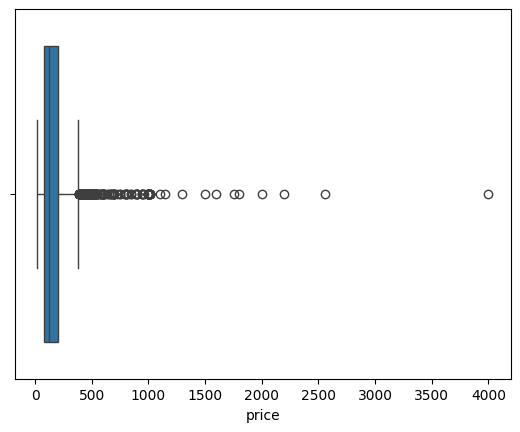

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# oxplot para la columna `price`
sns.boxplot(x=fd_train_imputed_num['price'])
plt.show()

El nuevo gráfico muestra menos puntos aislados y están más concentrados hacia la parte izquierda del gráfico.

Se observa que el límite superior ahora llega aproximadamente a $4,000.

Esto es un resultado directo de haber eliminado aquellos registros con precios superiores a $3,000 y que no justificaban dicho precio basados en otras características (como accommodates y beds).

La mayoría de los datos se encuentran dentro de un rango razonable para el contexto del dataset, lo cual debería mejorar el entrenamiento del modelo y su capacidad de generalización.

Ahora se puede aplicar una *transformación logarítmica* a 'price' para seguir mejorando la distribución de los precios, especialmente si aún hay cierta dispersión. Esta transformación ayudaría a reducir el rango de precios y a tener una distribución más simétrica.

In [ ]:
import numpy as np

# Aplicar la transformación logarítmica a la columna 'price' en train
# Nota: Añadimos una pequeña constante (1) para evitar el logaritmo de cero
fd_train_imputed_num['price_log'] = np.log1p(fd_train_imputed_num['price'])

# Verificar la transformación
print(fd_train_imputed_num[['price', 'price_log']].head())

# Eliminar la columna original 'price' para evitar problemas de colinealidad
fd_train_imputed_num.drop(columns=['price'], inplace=True)

"""# Guardar el dataset actualizado
fd_train.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_transformed.csv", sep=';', index=False)"""


   price  price_log
0  112.0   4.727388
1  118.0   4.779123
2   39.0   3.688879
3   61.0   4.127134
4   92.0   4.532599


'# Guardar el dataset actualizado\nfd_train.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_transformed.csv", sep=\';\', index=False)'

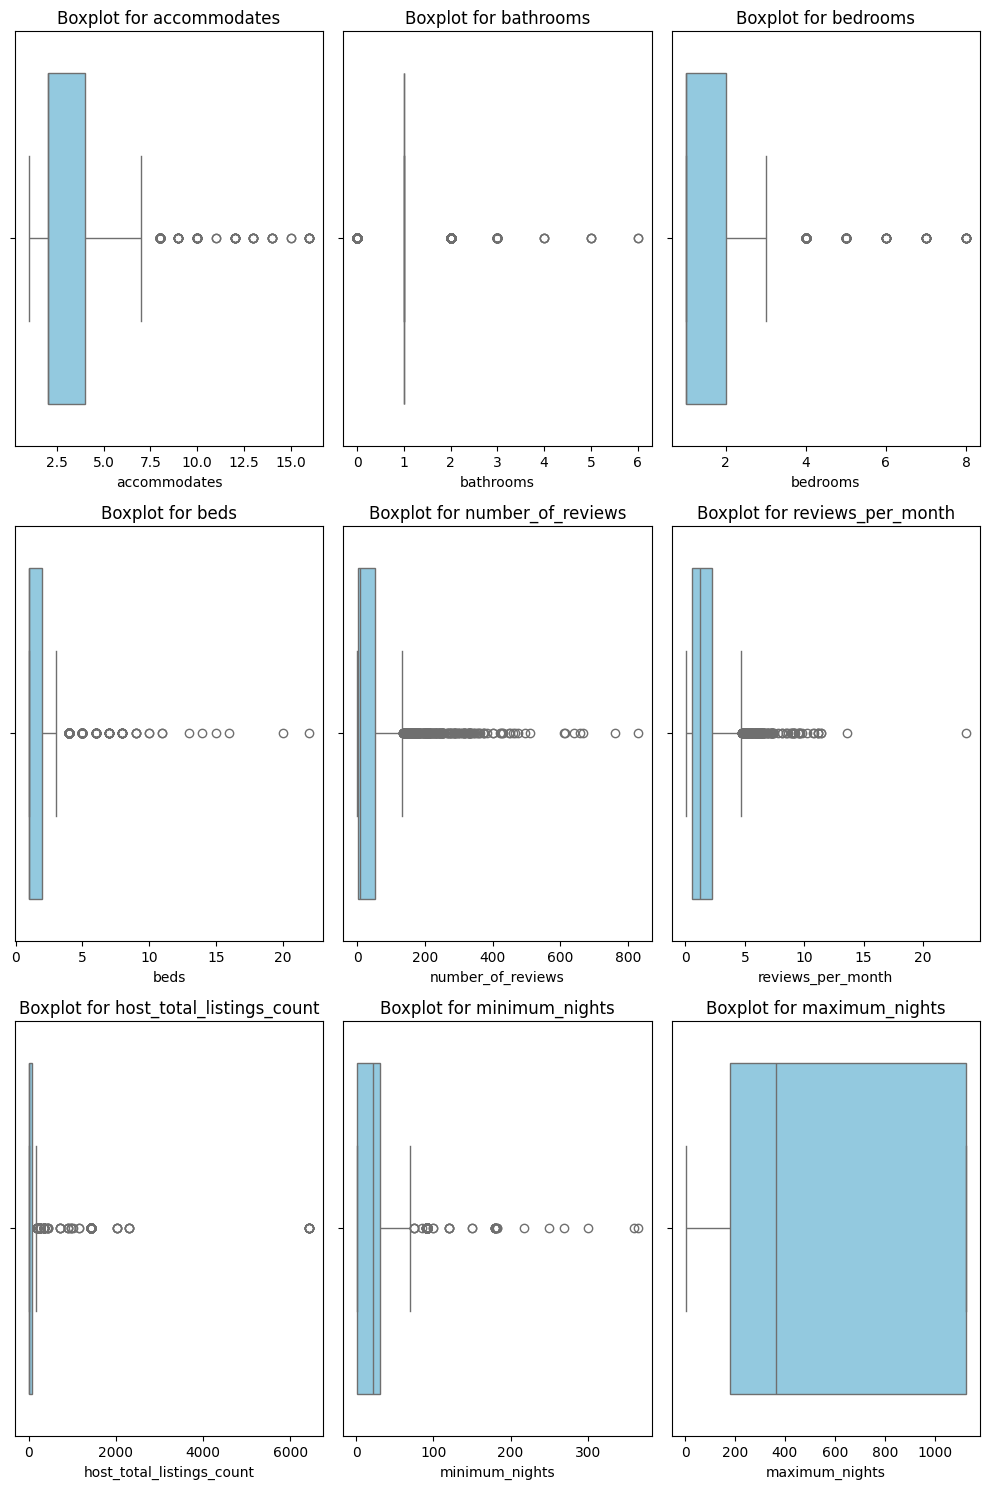

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas con outliers para visualización
columns_with_outliers = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'reviews_per_month', 'host_total_listings_count', 'minimum_nights', 'maximum_nights']

# Establecer el tamaño de la figura
plt.figure(figsize=(10, 15))  # Aumentar la altura para acomodar más subplots

# Generar boxplots para cada una de las variables con posibles outliers
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(3, 3, i)  # Definir una cuadrícula de 3x3 para 9 gráficos
    sns.boxplot(data=fd_train_imputed_num, x=column, color='skyblue')
    plt.title(f'Boxplot for {column}')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()


Capping: aplicaré capping al percentil 99 de cada columna en la lista *(accommodates, bathrooms, bedrooms, beds, number_of_reviews, reviews_per_month)*. Esto asegura que los valores que son superiores al percentil 99 se recorten (cap) al valor del percentil 99.

In [ ]:
import numpy as np
import pickle

# Aplicar capping para corregir outliers en el conjunto de entrenamiento (fd_train)
capping_thresholds = {}
for column in ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'reviews_per_month', 'host_total_listings_count', 'minimum_nights', 'maximum_nights']:
    # Calcular el threshold para el capping
    threshold = fd_train_imputed_num[column].quantile(0.99)
    capping_thresholds[column] = threshold

    # Aplicar capping en los valores que superan el threshold
    fd_train_imputed_num[column] = np.where(fd_train_imputed_num[column] > threshold, threshold, fd_train_imputed_num[column])

# Guardar los thresholds para ser usados posteriormente en val y test
with open('/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/capping_thresholds.pkl', 'wb') as f:
    pickle.dump(capping_thresholds, f)

# Verificar algunos valores después del capping en fd_train
print("Valores después del capping en 'host_total_listings_count':")
print(fd_train_imputed_num['host_total_listings_count'].sort_values(ascending=False).head())



Valores después del capping en 'host_total_listings_count':
172     1436.0
450     1436.0
531     1436.0
448     1436.0
1173    1436.0
Name: host_total_listings_count, dtype: float64


In [ ]:
# Guardar el fd_train_imputed_num_out preprocesado CON TRABAJO DE OUTLIERS en un archivo CSV
fd_train_imputed_num.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed_num_out.csv", sep=';', index=False)


In [ ]:
# Cargar el DataFrame preprocesado preprocesado CON TRABAJO DE OUTLIERS desde un archivo CSV
import pandas as pd
fd_train_imputed_num_out = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_imputed_num_out.csv", sep=';')


## NORMALIZACIÓN

In [ ]:
fd_train_imputed_num_out.shape

(2125, 37)

In [ ]:
# Obtener las columnas que son numéricas
numeric_columns = fd_train_imputed_num_out.select_dtypes(include=['float64', 'int64']).columns

# Contar cuántas columnas numéricas hay
num_numeric_columns = len(numeric_columns)

print("Número de columnas numéricas:", num_numeric_columns)
print("Columnas numéricas:", numeric_columns)


Número de columnas numéricas: 37
Columnas numéricas: Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathrooms_shared', 'years_being_host', 'num_host_verifications',
       'property_type_encoded', 'room_type_encoded', 'price_log'],
      dtype='object')


Quiero revisar *'neighbourhood', 'neighbourhood_cleansed'* por que debo eliminar alguna de ellas, poseen info similar.

In [ ]:
import pandas as pd

# Calcular la matriz de correlación para 'neighbourhood', 'neighbourhood_cleansed', y 'price_log'
corr_matrix = fd_train_imputed_num_out[['neighbourhood', 'neighbourhood_cleansed', 'price_log']].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación entre 'neighbourhood', 'neighbourhood_cleansed' y 'price_log':")
print(corr_matrix)

# Evaluar correlación específica entre 'neighbourhood' y 'neighbourhood_cleansed'
corr_neigh = corr_matrix.loc['neighbourhood', 'neighbourhood_cleansed']
print(f"\nCorrelación entre 'neighbourhood' y 'neighbourhood_cleansed': {corr_neigh}")

# Evaluar cuál columna tiene mayor correlación con 'price_log'
corr_with_price_neigh = corr_matrix.loc['neighbourhood', 'price_log']
corr_with_price_neigh_cleansed = corr_matrix.loc['neighbourhood_cleansed', 'price_log']

print(f"\nCorrelación entre 'neighbourhood' y 'price_log': {corr_with_price_neigh}")
print(f"Correlación entre 'neighbourhood_cleansed' y 'price_log': {corr_with_price_neigh_cleansed}")

# Decidir cuál columna quedarse
if abs(corr_with_price_neigh) > abs(corr_with_price_neigh_cleansed):
    print("\n'neighbourhood' tiene mayor correlación con el precio. Es mejor quedarte con esta columna.")
elif abs(corr_with_price_neigh) < abs(corr_with_price_neigh_cleansed):
    print("\n'neighbourhood_cleansed' tiene mayor correlación con el precio. Es mejor quedarte con esta columna.")
else:
    print("\nAmbas columnas tienen una correlación similar con el precio. Puedes elegir la que consideres más relevante o mantener ambas.")


Matriz de correlación entre 'neighbourhood', 'neighbourhood_cleansed' y 'price_log':
                        neighbourhood  neighbourhood_cleansed  price_log
neighbourhood                1.000000               -0.055149  -0.005356
neighbourhood_cleansed      -0.055149                1.000000   0.027791
price_log                   -0.005356                0.027791   1.000000

Correlación entre 'neighbourhood' y 'neighbourhood_cleansed': -0.05514885307452025

Correlación entre 'neighbourhood' y 'price_log': -0.005355917577795095
Correlación entre 'neighbourhood_cleansed' y 'price_log': 0.02779095121198352

'neighbourhood_cleansed' tiene mayor correlación con el precio. Es mejor quedarte con esta columna.


In [ ]:
#Eliminar la columna 'neighbourhood' para evitar redundancias

fd_train_imputed_num_out.drop(columns=['neighbourhood'], inplace=True)


In [ ]:
"""
fd_val_imputed_num_out.drop(columns=['neighbourhood'], inplace=True)
"""


""""
fd_test_imputed_num_out.drop(columns=['neighbourhood'], inplace=True)
""""

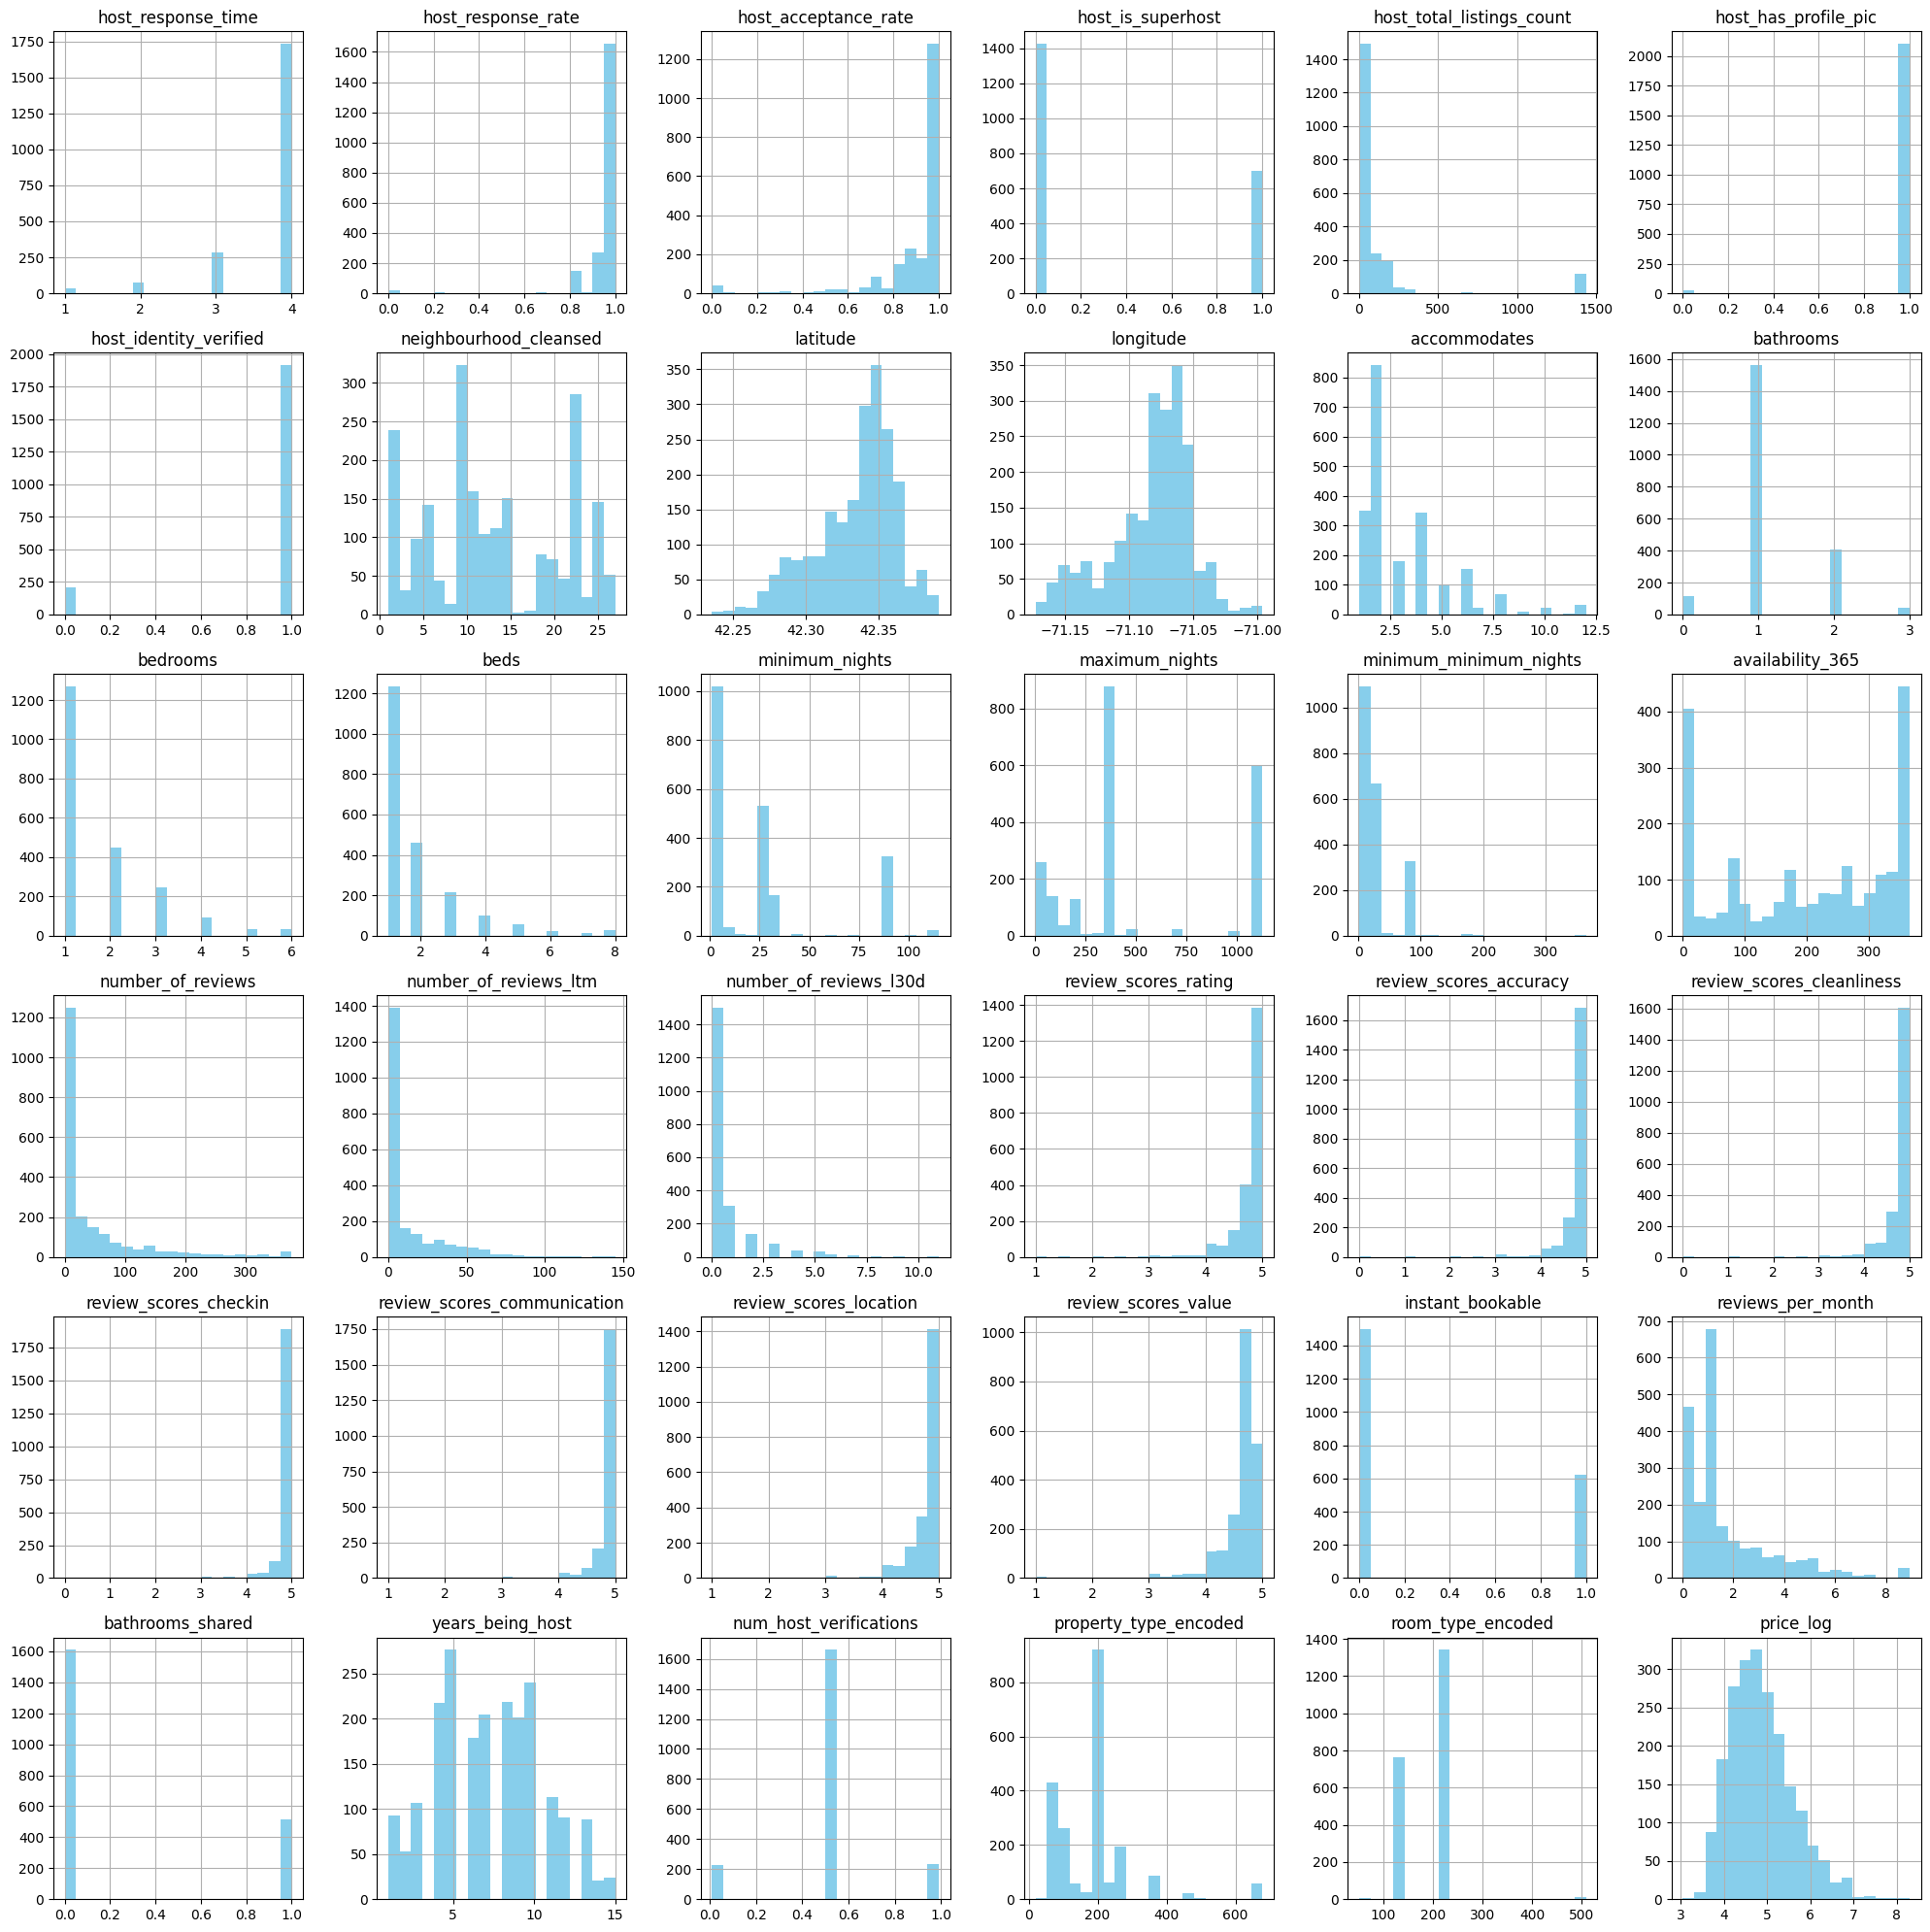

In [ ]:
import matplotlib.pyplot as plt

# Asegurarse de que numeric_columns contiene solo columnas que están actualmente en fd_train_imputed_num_out
numeric_columns = [col for col in numeric_columns if col in fd_train_imputed_num_out.columns]

# Crear histogramas de las columnas numéricas para evaluar la necesidad de normalización
fd_train_imputed_num_out[numeric_columns].hist(figsize=(20, 20), bins=20, color='skyblue')
plt.tight_layout()
plt.show()


In [ ]:
print(fd_train_imputed_num_out.head(6).to_string())

   host_response_time  host_response_rate  host_acceptance_rate  host_is_superhost  host_total_listings_count  host_has_profile_pic  host_identity_verified  neighbourhood_cleansed   latitude  longitude  accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  minimum_minimum_nights  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  instant_bookable  reviews_per_month  bathrooms_shared  years_being_host  num_host_verifications  property_type_encoded  room_type_encoded  price_log
0                   2                0.80                  1.00                  0                       22.0                     1                       1                      12  42.385820 -71.013920           2.0        1.0       1.0   1.0            91.0           365.0                      9

####Normalizaré 'bedrooms', 'beds', 'accommodates', 'bathrooms', que tienen valores como 1, 0 [0.01, 0.99]. Para que mas adelante no presenten problemas con funciones de activacion como sigmoid o tanh.

In [ ]:
# Revisar los valores máximos y mínimos de las columnas 'bedrooms' y 'beds' en fd_train_imputed_num_out
bedrooms_beds_stats = fd_train_imputed_num_out[['bedrooms', 'beds', 'accommodates', 'bathrooms']].agg(['min', 'max'])

# Mostrar los resultados
bedrooms_beds_stats


,bedrooms,beds,accommodates,bathrooms
min,1.0,1.0,1.0,0.0
max,6.0,8.0,12.0,3.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Inicializar el escalador Min-Max con rango ajustado
scaler_bedrooms_beds_adjusted = MinMaxScaler(feature_range=(0.01, 0.99))

# Aplicar el escalador a las columnas 'bedrooms', 'beds', 'accommodates', 'bathrooms'
fd_train_imputed_num_out[['bedrooms', 'beds', 'accommodates', 'bathrooms']] = scaler_bedrooms_beds_adjusted.fit_transform(
    fd_train_imputed_num_out[['bedrooms', 'beds', 'accommodates', 'bathrooms']]
)

# Guardar el escalador para usarlo en validación y prueba
joblib.dump(scaler_bedrooms_beds_adjusted, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/scaler_bedrooms_beds_adjusted.pkl')

# Verificar los valores después del ajuste
adjusted_bedrooms_beds_stats_train = fd_train_imputed_num_out[['bedrooms', 'beds', 'accommodates', 'bathrooms']].agg(['min', 'max'])

# Mostrar los resultados
print("Estadísticas después del ajuste en train:")
print(adjusted_bedrooms_beds_stats_train)


Estadísticas después del ajuste en train:
     bedrooms  beds  accommodates  bathrooms
min      0.01  0.01          0.01       0.01
max      0.99  0.99          0.99       0.99


In [ ]:
print(fd_train_imputed_num_out.head().to_string())

   host_response_time  host_response_rate  host_acceptance_rate  host_is_superhost  host_total_listings_count  host_has_profile_pic  host_identity_verified  neighbourhood_cleansed   latitude  longitude  accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  minimum_minimum_nights  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  instant_bookable  reviews_per_month  bathrooms_shared  years_being_host  num_host_verifications  property_type_encoded  room_type_encoded  price_log
0                   2                 0.8                  1.00                  0                       22.0                     1                       1                      12  42.385820 -71.013920      0.099091   0.336667      0.01  0.01            91.0           365.0                      9

#Columnas Numéricas para Normalización


###Transformación logarítmica a continuas (14 columnas):


host_total_listings_count

minimum_nights

maximum_nights

minimum_minimum_nights

availability_365

number_of_reviews

number_of_reviews_ltm

number_of_reviews_30d

reviews_per_month

years_being_host

bathrooms_shared




###Normalización Min-Max a discretas (15 columnas):


host_response_rate

host_acceptance_rate

neighbourhood_cleansed

latitude

longitude

review_scores_rating

review_scores_accuracy

review_scores_cleanliness

review_scores_checkin

review_scores_communication

review_scores_location

review_scores_value

property_type_encoded

room_type_encoded



###No requiere normalización - binarias (7 columnas):

host_is_superhost,
host_has_profile_pic,
host_identity_verified,
instant_bookable,
bathrooms_shared
host_response_time
num_host_verifications

price_log (ya transformada).

In [ ]:
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler

# Columnas seleccionadas para log-transform
columns_log_transform = [
    'host_total_listings_count', 'minimum_nights', 'maximum_nights',
    'minimum_minimum_nights', 'availability_365', 'number_of_reviews',
    'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month',
    'property_type_encoded','room_type_encoded'
]

# Ajustar valores negativos y aplicar log1p
fd_train_imputed_num_out[columns_log_transform] = fd_train_imputed_num_out[columns_log_transform].clip(lower=0).apply(np.log1p)

# Verificar y escalar columnas con valores > 1 después del log1p
columns_to_scale = [col for col in columns_log_transform if fd_train_imputed_num_out[col].max() > 1]
if columns_to_scale:
    scaler = MinMaxScaler(feature_range=(0.01, 0.99))
    fd_train_imputed_num_out[columns_to_scale] = scaler.fit_transform(fd_train_imputed_num_out[columns_to_scale])
    joblib.dump(scaler, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/scaler_log_transform.pkl')

# Guardar lista de columnas para log-transform
joblib.dump(columns_log_transform, '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/log_transform_columns.pkl')



['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/log_transform_columns.pkl']

In [ ]:
print(fd_train_imputed_num_out.head().to_string())

   host_response_time  host_response_rate  host_acceptance_rate  host_is_superhost  host_total_listings_count  host_has_profile_pic  host_identity_verified  neighbourhood_cleansed   latitude  longitude  accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  minimum_minimum_nights  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  instant_bookable  reviews_per_month  bathrooms_shared  years_being_host  num_host_verifications  property_type_encoded  room_type_encoded  price_log
0                   2                 0.8                  1.00                  0                   0.373911                     1                       1                      12  42.385820 -71.013920      0.099091   0.336667      0.01  0.01        0.933662        0.804212                0.73023

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Columnas seleccionadas para Min-Max Scaling
columns_min_max = [
    'host_response_rate', 'host_acceptance_rate',
    'latitude', 'longitude',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'years_being_host'
]

# Inicializar el escalador Min-Max
scaler_min_max = MinMaxScaler(feature_range=(0.01, 0.99))

# Aplicar el escalador a las columnas seleccionadas
fd_train_imputed_num_out[columns_min_max] = scaler_min_max.fit_transform(fd_train_imputed_num_out[columns_min_max])

# Guardar el escalador para reutilizar en val y test
scaler_file = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/scaler_min_max_train.pkl'
joblib.dump(scaler_min_max, scaler_file)

# Guardar las columnas seleccionadas para escalar
columns_min_max_file = '/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/columns_min_max.pkl'
joblib.dump(columns_min_max, columns_min_max_file)


['/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/columns_min_max.pkl']

In [ ]:
print(fd_train_imputed_num_out.head().to_string())

   host_response_time  host_response_rate  host_acceptance_rate  host_is_superhost  host_total_listings_count  host_has_profile_pic  host_identity_verified  neighbourhood_cleansed  latitude  longitude  accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  minimum_minimum_nights  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  instant_bookable  reviews_per_month  bathrooms_shared  years_being_host  num_host_verifications  property_type_encoded  room_type_encoded  price_log
0                   2               0.794                0.9900                  0                   0.373911                     1                       1                      12  0.955465   0.891029      0.099091   0.336667      0.01  0.01        0.933662        0.804212                0.730238 

*'neighbourhood_cleansed'* ya paso por labelencoder y esta codficada.

No necesita en este momento normalizacion, puede trabajarse mas segun el modelo que haga si es con redes neuronales o arboles, etc.

In [ ]:
fd_train_imputed_num_out['neighbourhood_cleansed'].unique()

array([12, 11, 23,  3, 22, 20, 10,  6, 25,  2, 13, 15,  1,  7, 26,  4, 14,
       18, 21,  8, 19, 24, 27, 17, 16])

In [ ]:
import pandas as pd

# Revisar las frecuencias de cada valor en la columna 'neighbourhood_cleansed'
print("Frecuencia de valores en 'neighbourhood_cleansed':")
print(fd_train_imputed_num_out['neighbourhood_cleansed'].value_counts())

# Confirmar el número total de valores únicos
print(f"\nNúmero total de vecindarios únicos: {fd_train_imputed_num_out['neighbourhood_cleansed'].nunique()}")


Frecuencia de valores en 'neighbourhood_cleansed':
neighbourhood_cleansed
10    323
22    181
11    159
2     159
25    146
6     142
15    119
13    112
12    104
23    104
4      98
1      80
20     71
21     47
7      44
19     42
18     36
27     33
14     32
3      31
24     23
26     18
8      14
17      5
16      2
Name: count, dtype: int64

Número total de vecindarios únicos: 25


###GUARDO fd_train_imputed_num_out con final de preprocesado y NORMALIZACION en un archivo CSV fd_train_finpreprocesado.

In [ ]:
# Guardar el fd_train_imputed_num_out con final de preprocesado y NORMALIZACION en un archivo CSV fd_train_finpreprocesado.
fd_train_imputed_num_out.to_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';', index=False)


In [ ]:
# Cargar el fd_train_finpreprocesado.csv
import pandas as pd
fd_train_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';')

In [ ]:
print(fd_train_finpreprocesado.head())
print(fd_train_finpreprocesado.shape)


   host_response_time  host_response_rate  host_acceptance_rate  \
0                   2               0.794                0.9900   
1                   4               0.990                0.9900   
2                   4               0.794                0.9802   
3                   4               0.990                0.9508   
4                   4               0.990                0.9116   

   host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                  0                   0.373911                     1   
1                  0                   0.553949                     1   
2                  0                   0.783338                     1   
3                  0                   0.503815                     1   
4                  0                   0.645141                     1   

   host_identity_verified  neighbourhood_cleansed  latitude  longitude  ...  \
0                       1                      12  0.955465   0.891029  ...   


Debo sincronizar los registros de mi data tabular preprocesada con mi data de images.npy pues hemos borrado 3 registros en el preprocesamiento por lo que ya no coinciden los registro originales.

Ahora tengo (2125, 36) de train
Orignalmente eran 2128 de train y asi mismo deb estar la data en images.npy despues de hacer el split.

# **Generar y_train, y_val, y_test**


In [7]:
import pandas as pd
import numpy as np

# Cargar el archivo tabular preprocesado de validación
fd_val_finpreprocesado = pd.read_csv(
    "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val_finpreprocesado.csv",
    sep=';',
    encoding='utf-8',
    index_col=False
)

# Extraer etiqueta 'price_log'
y_val = fd_val_finpreprocesado["price_log"].values

# Guardar las etiquetas de validación
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_val.npy", y_val)

print("Etiquetas de validación guardadas como y_val.npy.")


Etiquetas de entrenamiento guardadas como y_train.npy.


In [10]:
import pandas as pd
import numpy as np

# Cargar el archivo tabular preprocesado de validación
fd_val_finpreprocesado = pd.read_csv(
    "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val_finpreprocesado.csv",
    sep=';',
    encoding='utf-8',
    index_col=False
)

# Extraer etiqueta price_log'
y_val = fd_val_finpreprocesado["price_log"].values

# Guardar las etiquetas de validación
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_val.npy", y_val)

print("Etiquetas de validación guardadas como y_val.npy.")


Etiquetas de validación guardadas como y_val.npy.


In [8]:
# Cargar el archivo tabular preprocesado de prueba
fd_test_finpreprocesado = pd.read_csv(
    "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test_finpreprocesado.csv",
    sep=';',
    encoding='utf-8',
    index_col=False
)

# Extraer etiqueta 'price_log'
y_test = fd_test_finpreprocesado["price_log"].values

# Guardar las etiquetas de prueba
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_test.npy", y_test)

print("Etiquetas de prueba guardadas como y_test.npy.")


Etiquetas de prueba guardadas como y_test.npy.


##SINCRONIZACIÓN REGISTROS DATA TABULAR Y DATA IMAGENES

In [11]:
import pandas as pd
import numpy as np

# Cargar el dataframe de train
fd_train_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';', encoding='utf-8', index_col=False)

# Cargar las imágenes de train previamente guardadas
imgs_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train.npy")

# Asegurar de que ambas estructuras tienen la misma longitud
if fd_train_finpreprocesado.shape[0] == imgs_train.shape[0]:
    print("Las imágenes y los datos tabulares tienen el mismo número de registros. No es necesario sincronizar.")
else:
    # Sincronizar imágenes con datos tabulares utilizando los índices válidos del DataFrame (posiciones reales)

    # Seleccionamos solamente las filas que tienen datos después del preprocesamiento
    valid_indices = fd_train_finpreprocesado.index.tolist()
    imgs_train_sync = imgs_train[valid_indices]

    # Guardar el conjunto de imágenes sincronizado
    np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_sync.npy", imgs_train_sync)

    print("Sincronización completada. Se ha guardado el nuevo conjunto de imágenes sincronizado como imgs_train_sync.npy.")

# Verificar los shapes después de la sincronización
imgs_train_sync = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_sync.npy")
print("Shape de imgs_train_sync:", imgs_train_sync.shape)
print("Shape de fd_train_finpreprocesado:", fd_train_finpreprocesado.shape)




Sincronización completada. Se ha guardado el nuevo conjunto de imágenes sincronizado como imgs_train_sync.npy.
Shape de imgs_train_sync: (2125, 224, 224, 3)
Shape de fd_train_finpreprocesado: (2125, 36)


##**Normalizacion y Redimensionado de IMAGENES**
Antes de hacer split de conjunto imagenes ya habiamos hecho normalizacion y escala entre 0 y 1 con esto:

images, idxs = download_images(data['picture_url'])
images = images.astype("float32") / 255.
images.shape


Pero **no estan normalizadas con respecto a la media y varianza.**


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import joblib

# Cargar las imágenes del conjunto de entrenamiento
imgs_train_sync = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_sync.npy")

# Calcular la media y desviación estándar de cada canal (R, G, B)
mean_per_channel = np.mean(imgs_train_sync, axis=(0, 1, 2))
std_per_channel = np.std(imgs_train_sync, axis=(0, 1, 2))

# Guardar la media y la desviación estándar para aplicar en validación y prueba
joblib.dump(mean_per_channel, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/mean_per_channel.pkl")
joblib.dump(std_per_channel, "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/std_per_channel.pkl")

print(f"Media por canal (R, G, B): {mean_per_channel}")
print(f"Desviación estándar por canal (R, G, B): {std_per_channel}")

# Normalizar las imágenes del conjunto de entrenamiento
imgs_train_normalized = (imgs_train_sync - mean_per_channel) / std_per_channel

# Guardar el conjunto de imágenes normalizadas
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_normalized.npy", imgs_train_normalized)

print("Normalización de train completada y guardada como imgs_train_normalized.npy")


Media por canal (R, G, B): [0.15734933 0.15734933 0.15734933]
Desviación estándar por canal (R, G, B): [0.39667282 0.3654313  0.35501668]
Normalización de train completada y guardada como imgs_train_normalized.npy


## **Normalización y redimensionado en VAL - IMÁGENES**

In [4]:
# Normalizacion y redimensionado en VAL - IMÁGENES

import numpy as np
import joblib

# Cargar las imágenes del conjunto de validación
imgs_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val.npy")

# Cargar la media y desviación estándar calculadas del conjunto de entrenamiento
mean_per_channel = joblib.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/mean_per_channel.pkl")
std_per_channel = joblib.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/std_per_channel.pkl")

# Normalizar las imágenes del conjunto de validación usando la media y desviación del conjunto de entrenamiento
imgs_val_normalized = (imgs_val - mean_per_channel) / std_per_channel

# Guardar el conjunto de imágenes normalizadas de validación
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_normalized.npy", imgs_val_normalized)

print("Normalización de val completada y guardada como imgs_val_normalized.npy")

Normalización de val completada y guardada como imgs_val_normalized.npy


## **Normalización y redimensionado en TEST - IMÁGENES**

In [5]:
# Normalizacion y redimensionado en TEST - IMÁGENES

import numpy as np
import joblib

# Cargar las imágenes del conjunto de prueba
imgs_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test.npy")

# Cargar la media y desviación estándar calculadas del conjunto de entrenamiento
mean_per_channel = joblib.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/mean_per_channel.pkl")
std_per_channel = joblib.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/std_per_channel.pkl")

# Normalizar las imágenes del conjunto de prueba usando la media y desviación del conjunto de entrenamiento
imgs_test_normalized = (imgs_test - mean_per_channel) / std_per_channel

# Guardar el conjunto de imágenes normalizadas de prueba
np.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test_normalized.npy", imgs_test_normalized)

print("Normalización de test completada y guardada como imgs_test_normalized.npy")



Normalización de test completada y guardada como imgs_test_normalized.npy


In [12]:
import numpy as np
import pandas as pd

# Cargar imágenes y etiquetas
X_train_imgs = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_train_normalized.npy")
X_val_imgs = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_val_normalized.npy")
X_test_imgs = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/imgs_test_normalized.npy")

y_train = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_train.npy")
y_val = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_val.npy")
y_test = np.load("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/y_test.npy")

# Verificar las formas
print(f"Shape de imágenes de entrenamiento: {X_train_imgs.shape}, Shape de etiquetas: {y_train.shape}")
print(f"Shape de imágenes de validación: {X_val_imgs.shape}, Shape de etiquetas: {y_val.shape}")
print(f"Shape de imágenes de prueba: {X_test_imgs.shape}, Shape de etiquetas: {y_test.shape}")


Shape de imágenes de entrenamiento: (2125, 224, 224, 3), Shape de etiquetas: (2125,)
Shape de imágenes de validación: (376, 224, 224, 3), Shape de etiquetas: (376,)
Shape de imágenes de prueba: (627, 224, 224, 3), Shape de etiquetas: (627,)


###VERIFICACION  CONSISTENCIA DE DATOS EN ENTRENAMIENTO, VALIDACIÓN Y PRUEBA

In [ ]:
import pandas as pd

# Cargar el fd_train_finpreprocesado.csv

fd_train_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';')

# Cargar el fd_val_finpreprocesado.csv

fd_val_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val_finpreprocesado.csv", sep=';')

# Cargar el fd_test_finpreprocesado.csv

fd_test_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test_finpreprocesado.csv", sep=';')


In [ ]:
import pandas as pd

# Configuración para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)

# Para fd_val_finalpreprocesado
print("\nMínimo y máximo en cada columna de fd_train_finpreprocesado:")
min_max_train = fd_train_finpreprocesado.agg(['min', 'max'])
print(min_max_train)

# Opcional: Restaurar configuración para evitar demasiadas columnas en futuras salidas
pd.reset_option('display.max_columns')


Mínimo y máximo en cada columna de fd_train_finpreprocesado:
     host_response_time  host_response_rate  host_acceptance_rate  \
min                   1                0.01                  0.01   
max                   4                0.99                  0.99   

     host_is_superhost  host_total_listings_count  host_has_profile_pic  \
min                  0                       0.01                     0   
max                  1                       0.99                     1   

     host_identity_verified  neighbourhood_cleansed  latitude  longitude  \
min                       0                       1      0.01       0.01   
max                       1                      27      0.99       0.99   

     accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
min          0.01       0.01      0.01  0.01            0.01            0.01   
max          0.99       0.99      0.99  0.99            0.99            0.99   

     minimum_minimum_nights  avail